# Data Mining for Business Analytics

## Model Evaluation Measures 

Spring 2019 - Prof. George Valkanas

Material based on content courtesy of Prof. Foster Provost

***

Import all of the packages we will need.

In [1]:
# Import the libraries we will be using
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

We have already seen a measure to evaluate the performance / effectiveness of a data mining model: **accuracy**. 

<table>
    <tr style="font-size: large; font-weight: bold; background-color: light-gray">
        <td style="border: 2px solid black"> ID </td> 
        <td style="border: 2px solid black"> True Label </td> 
        <td style="border: 2px solid black"> Predicted Label </td>
    </tr>
    <tr style="background-color: lightgreen">
        <td style="border: 2px solid black"> 1 </td> <td> 1 </td> <td style="border: 2px solid black"> 1 </td>
    </tr>
    <tr style="background-color: lightgreen; border: 2px solid black">
        <td style="border: 2px solid black"> 2 </td> <td> 1 </td> <td style="border: 2px solid black"> 1 </td>
    </tr>
    <tr style="background-color: lightgreen; border: 2px solid black">
        <td style="border: 2px solid black"> 3 </td> <td> 0 </td> <td style="border: 2px solid black"> 0 </td>
    </tr>
    <tr style="background-color: tomato; border: 2px solid black">
        <td style="border: 2px solid black"> 4 </td> <td> 0 </td> <td style="border: 2px solid black"> 1 </td>
    </tr>
    <tr style="background-color: lightgreen; border: 2px solid black">
        <td style="border: 2px solid black"> 5 </td> <td> 0 </td> <td style="border: 2px solid black"> 0 </td>
    </tr>
    <tr style="background-color: lightgreen; border: 2px solid black">
        <td style="border: 2px solid black"> 6 </td> <td> 1 </td> <td style="border: 2px solid black"> 1 </td>
    </tr>
    <tr style="background-color: tomato; border: 2px solid black">
        <td style="border: 2px solid black"> 7 </td> <td> 1 </td> <td style="border: 2px solid black"> 0 </td>
    </tr>
    <tr style="background-color: tomato; border: 2px solid black">
        <td style="border: 2px solid black"> 8 </td> <td> 1 </td> <td style="border: 2px solid black"> 0 </td>
    </tr>
    <tr style="background-color: lightgreen; border: 2px solid black">
        <td style="border: 2px solid black"> 9 </td> <td> 0 </td> <td style="border: 2px solid black"> 0 </td>
    </tr>
    <tr style="background-color: tomato; border: 2px solid black">
        <td style="border: 2px solid black"> 10 </td> <td> 0 </td> <td style="border: 2px solid black"> 1 </td>
    </tr>
</table>


It may take us a while to digest the information in the above table, not to mention to use it and actually evaluate the model in question; and it's only 10 rows! Instead, a more aggregate view of that information would be incredibly useful.

However, we want to maintain all of the important information that is available there. Accuracy captures only part of it, because it tells us only how many things were correctly classified.  Even then, things are lumped together, as we consider cases of "1" and cases of "0" to be equally important.  For similar reasons, we would like to know how many of the _misclassified_ instances truly belong to class "0" or to class "1".  Accuracy doesn't answer that.

### The Confusion Matrix

A succinct version of the previous information is given by a **confusion matrix**.  For a _binary_ classification problem, the confusion matrix has a 2x2 layout. A visual diagram of what 


<table style="border: 0px">
    <tr style="border: 0px">
        <td style="width: 60%; text-align: justify">
<table width="100%">
    <tbody>
        <tr style="background: rgba(255, 255, 255, 0.1)">
            <td colspan="2" width="30%"></td>
            <td colspan="2" style="border: 2px solid black; background: white; text-align: center" ><b>True Class</b></td>
        </tr>
        <tr style="background: rgba(255, 255, 255, 0.1)">
            <td colspan="2"></td>
            <td style="border: 2px solid black; background: #E8E8E8; text-align: center"><b>Positive (1)</b></td>
            <td style="border: 2px solid black; background: #E8E8E8; text-align: center"><b>Negative (0)</b></td>
        </tr>
        <tr>
            <td rowspan="2" style="border: 2px solid black; background: white; text-align: center"><b>Predicted<br/>Class</b></td>
            <td style="border: 2px solid black; background: #E8E8E8; text-align: center"><b>Positive<br/>("Yes")</b></td>
            <td style="border: 2px solid black; background: lightgreen; text-align: center">
                <b>True Positive (TP)</b>
            </td>
            <td style="border: 2px solid black; background: #ff9999; text-align: center">
                <b>False Positive (FP)</b>
            </td>
        </tr>
        <tr>
            <td style="border: 2px solid black; background: #E8E8E8; text-align: center; text-align: center">
                <b>Negative<br/>("No")</b>
            </td>
            <td style="background: #ff9999; border: 2px solid black; text-align: center">
                <b>False Negative (FN)</b>
            </td>
            <td style="background: lightgreen; border: 2px solid black; text-align: center">
                <b>True Negative (TN)</b>
            </td>
        </tr>
    </tbody>
</table>
            <span style="display: block; text-align: center">
                <b><br/>Confusion Matrix</b>
            </span>
        </td>
        <td style="border: 0px; width: 5%"></td>
        <td style="display: block; text-align: justify">
            <img src="images/Precisionrecall.svg.png" height=75% width=75% /> <br/>
            <span style="display: block; text-align: center">
                <b>Visual Representation of a Confusion Matrix</b>
            </span>
        </td>
    </tr>
</table>

Original <a href="https://en.wikipedia.org/wiki/Precision_and_recall">Image source</a>

***


Using the confusion matrix, we can compute several other measures. For example:

$$accuracy = \frac{TP + TN}{TP + FP + FN + TN} $$

and

$$precision = \frac{TP}{TP + FP}$$

### Important and overlooked (always remember this!)

The values of a confusion matrix are computed according to the predicted _class_ of a model, _not_ its probability. Therefore, a confusion matrix is defined with respect to a **classifier**, not a scoring model (e.g., a class-probability estimation model).  Our models *are* scoring models!

We will return to this point later on.

***

Let's see how we can compute a Confusion Matrix in Python. We've had enough of toy examples and "random" datasets. Let's use a real dataset this time!


We're going to use a mail response data set from a real direct marketing campaign. The dataset is located in `data/mailing.csv`. Each record represents an individual who was targeted with a direct marketing offer.  The offer was a solicitation to make a charitable donation. 

The columns (features) are:

```
income       household income
Firstdate    data assoc. with the first gift by this individual
Lastdate     data associated with the most recent gift 
Amount       average amount by this individual over all periods (incl. zeros)
rfaf2        frequency code
rfaa2        donation amount code
pepstrfl     flag indicating a star donator
glast        amount of last gift
gavr         amount of average gift
```

The target variables is `class` and is equal to `1` if they gave to this campaign and `0` otherwise.

Let's first read the data and see what a few entries contain.

In [2]:
original = pd.read_csv("data/mailing.csv")  # Load the data
original.head()  # Let's take a look at the data

,Income,Firstdate,Lastdate,Amount,rfaf2,rfaa2,pepstrfl,glast,gavr,class
0,3,9409,9509,0.06,1,G,0,50,30.00,0
1,2,9201,9602,0.16,4,G,X,20,20.55,1
2,0,9510,9603,0.20,4,E,0,5,8.75,0
3,6,9409,9603,0.13,2,G,0,25,22.50,0
4,0,9310,9511,0.10,1,G,0,25,12.50,0


From the description above, and the head of the data, we see that two of the fields are **categorical** (text) instead of the typical **numerical** fields we have been looking at until this point. Today, one of the models we will be using is a logistic regression. From the previous classes, we have seen that logistic regression requires *all* fields to be numerical. To do this, we are going to create "dummy" variables for all the fields that are categorical.

#### Dummyize
A dummy variable is a binary variable corresponding to one value of a categorical variable.
The typical way to create dummies for a field is to create new variables for each possible category of the field. For example consider a field called color that can have the possible values "red", "blue", and "green". To dummyize color, we would create three new features: "color_red", "color_blue", and "color_green". These fields would take the value 1 or 0 depending on the actual value of color. Each record can only have one of these fields set to 1!

Notes:

- You can also leave out one of the possible categories. For example, in the above example that had three possible values, you can create only two dummies. This, because when "color_red"=0 and "color_blue"=0 it means that "color_green=1".  Often all three dummies are created anyway; it is slightly redundant, but makes the models more comprehensible.

- There also are cases where non-numeric variables can take on multiple values (for example, `colors = {red, white, blue}`).  In these cases again often binary variables are created for each value, the obvious difference being that now more than one can be non-zero (and you would need to represent all the values).
 

So.  Let's dummyize the fields `rfaa2` and `pepstrfl`.

In [3]:
data = original.copy()
for field in ['rfaa2', 'pepstrfl']:  # Do the same thing for the two fields of interest
    # Go through each possible value 
    for value in data[field].unique():
        # Create a new binary field
        data[field + "_" + value] = pd.Series(data[field] == value, dtype=int)

    # Drop the original field
    data = data.drop([field], axis=1)
    
# Let's look at the data again, after the modifications
data.head()

,Income,Firstdate,Lastdate,Amount,rfaf2,glast,gavr,class,rfaa2_G,rfaa2_E,rfaa2_F,rfaa2_D,pepstrfl_0,pepstrfl_X
0,3,9409,9509,0.06,1,50,30.00,0,1,0,0,0,1,0
1,2,9201,9602,0.16,4,20,20.55,1,1,0,0,0,0,1
2,0,9510,9603,0.20,4,5,8.75,0,0,1,0,0,1,0
3,6,9409,9603,0.13,2,25,22.50,0,1,0,0,0,1,0
4,0,9310,9511,0.10,1,25,12.50,0,1,0,0,0,1,0


We will use part of our dataset for training and the rest of it for testing. Because we are doing this for illustration purposes, we will do a simple split of the data ourselves. However, when doing this we should be using a more robust methodological approach (which would that be?)

In [4]:
# The "data" dataframe contains everything together.
# Get the features separately from the class.
X = data.drop(['class'], axis=1)
Y = data['class']

In [5]:
# Keep 75% of the data for training and 25% for testing. We have used this method before.
X_mailing_train, X_mailing_test, Y_mailing_train, Y_mailing_test = train_test_split(X, Y, train_size=.75)

C:\Users\ashle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
# Let's train a Logistic Regression model on our training set
model_mailing = LogisticRegression(C=1000000)   # Remember what a large C value means!!!
model_mailing.fit(X_mailing_train, Y_mailing_train)

LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [7]:
# Apply the trained model on the testing dataset and get the predicted classes
predictions = model_mailing.predict(X_mailing_test)

Let's create our confusion matrix. To do that we need:
1. The predicted class for each instance in the test set
1. The true class for each instance in the test set

In [8]:
# Let's compute the confusion matrix first.
# To do that we need the actual classes and the predicted ones
conf_mtx = metrics.confusion_matrix(Y_mailing_test, predictions, labels=[1, 0])


In [9]:
# Let's turn the confusion matrix into a DataFrame, to make it more presentable
conf_mtx_df = pd.DataFrame(conf_mtx.T, columns=['(True) p', '(True) n'], index=['[Predicted] Y', '[Predicted] N'])
conf_mtx_df

,(True) p,(True) n
[Predicted] Y,0,1
[Predicted] N,2418,45526


**Question 1:** What do you think? Looking at the confusion matrix above, is that a good model?

**Question 2:** What do you expect if you decrease the value for `C` above ?

**Task 1:** Try the same with a Decision Tree, with a maximum depth of your choice. What does your confusion matrix look like? What do you think about the resulting model?

***

### A Scoring Model

As previously stated, our models are _scoring_ models. That means that they produce a value reflecting the class-probability estimation. In our code above, instead of the probability estimation, we asked directly for the _most probable_ class. In practical applications this isn't very useful or meaningful, for a number of reasons, and our previous example demonstrates how such an approach can fail spectacularly.

So, what can we do? In reality, we use the probability estimates _directly_. We've used code that does that: the probabilistic decision surfaces!

The piece of code below shows how we compute the class probability for each of the _testing_ instances, using a trained model. We will use a logistic regression model.

In [10]:
# Get probabilities that an item belongs to class=1
probabilities = model_mailing.predict_proba(X_mailing_test)[:, 1]

# Print the probabilities, just to see some examples
probabilities

array([0.04006382, 0.06349717, 0.05467123, ..., 0.06792886, 0.0597511 ,
       0.03722733])

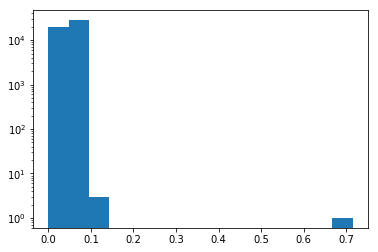

In [11]:
# Let's see what the distribution of those probabilities are
plt.figure()
plt.hist(probabilities, bins=15, range=(min(probabilities), max(probabilities)), log=True)
plt.show()

These are pretty low probabilities, well below an "expected" 0.5 value ! It makes sense then that practically everything was classified as 0!

**Question:** How do you think that we should fix that?
***

Well, instead of relying on a threshold defined by the Python package (or other means), let's use our own! Then an instance with a probability estimate greater than our threshold will be marked as "positive".

In [12]:
# *We* get to choose the value
threshold = 0.08

# The `probabilities` variable is of np.array type.
# Anything above the threshold belongs to class 1, otherwise to class 0
thresh_predictions = (probabilities > threshold).astype(int)

# Let's print the predictions again
thresh_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
# Compute the confusion matrix with the thresholded predictions!
conf_mtx = metrics.confusion_matrix(Y_mailing_test, thresh_predictions, labels=[1, 0])

# Like before, once we have the matrix, we convert it to a dataframe for a nicer visualization
conf_mtx_df = pd.DataFrame(conf_mtx.T, columns=['(True) p', '(True) n'], index=['[Predicted] Y', '[Predicted] N'])
conf_mtx_df

,(True) p,(True) n
[Predicted] Y,10,109
[Predicted] N,2408,45418


**Question 1:** What is the accuracy for this threshold?

**Question 2:** Is this good performance? Is it _better_ than before?

**Question 3:** Is that the _right_ threshold? How can we tell?

**Task 1:** Play around with the threshold value and see what the confusion matrix is.

**Task 2:** Redo the process, but use a Decision Tree Classifier. How do the values look in that case for different thresholds?

***

### Important and overlooked (cont'd)

From the previous discussion it is clear that, actually, we can use our scoring models to create confusion matrices, _as long as_ we use a *threshold* on the score! This approach allows for great flexibility.

The threshold should be chosen _carefully_, and **with the business need in mind**.  For binary classification problems, most modeling programs use a default threshold of _0.5_ on the predicted class probability estimate.   This is because the modeling program does not know the business setting, and 0.5 makes sense as a default (in expectation it gives the maximum classification accuracy, if the probabilities are well calibrated).
***

### Expanding on the single threshold idea

One of the previous tasks was to "play around" with the threshold and see the resulting confusion matrix.  As fun as this may be, it is impractical in real life scenarios.  We would like something more automated than that.

**Question:** Can you think of a way to "automate" this thresholding idea? (Hint: _When_ do you expect the values of the confusion matrix to change? )

***

Let's start with a simpler approach first, to illustrate some basic points.

In [14]:
# Let's train our model on the *training data*
model_mailing = LogisticRegression(C=10)
model_mailing.fit(X_mailing_train, Y_mailing_train)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
# Let's get the probabilities once more
probabilities = model_mailing.predict_proba(X_mailing_test)[:, 1]


In [16]:
# The built-in Python zip method: https://www.programiz.com/python-programming/methods/built-in/zip

# Let's show the PROBABILITY alongside to the PREDICTED class
logRegDf = pd.DataFrame(list(zip(probabilities, Y_mailing_test)), columns=["PROBABILITY", "TRUE_CLASS"])
logRegDf

,PROBABILITY,TRUE_CLASS
0,0.040063,0
1,0.063496,0
2,0.054670,0
3,0.034680,0
4,0.050264,0
5,0.045943,0
6,0.054751,0
7,0.066748,0
8,0.047426,0
9,0.044355,0


The probability values are _unordered_. We must sort them first.

In [17]:
logReg_SortedProb = logRegDf.sort_values(by=['PROBABILITY'], ascending=False)
logReg_SortedProb

,PROBABILITY,TRUE_CLASS
29116,7.150080e-01,0
29841,1.076233e-01,0
19423,9.910971e-02,0
4667,9.721848e-02,0
13598,8.814679e-02,0
36580,8.515173e-02,0
34463,8.501329e-02,0
39501,8.407526e-02,0
2046,8.373524e-02,0
32857,8.358671e-02,0


In [18]:
logReg_SortedProb["CUMUL_CORRECT"] = logReg_SortedProb["TRUE_CLASS"].cumsum()
logReg_SortedProb

,PROBABILITY,TRUE_CLASS,CUMUL_CORRECT
29116,7.150080e-01,0,0
29841,1.076233e-01,0,0
19423,9.910971e-02,0,0
4667,9.721848e-02,0,0
13598,8.814679e-02,0,0
36580,8.515173e-02,0,0
34463,8.501329e-02,0,0
39501,8.407526e-02,0,0
2046,8.373524e-02,0,0
32857,8.358671e-02,0,0


In [19]:
# On the y-axis we want to plot our cumulative correct response
yAxisCumul = logReg_SortedProb["CUMUL_CORRECT"]

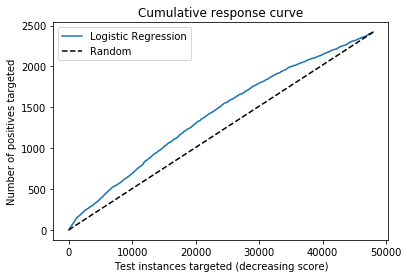

In [20]:
# Plot
plt.plot(range(0, len(yAxisCumul)), yAxisCumul, label="Logistic Regression")
plt.plot([0, len(yAxisCumul)], [0, yAxisCumul.max()], 'k--', label="Random")  # This creates a LINE
plt.xlabel("Test instances targeted (decreasing score)")
plt.ylabel("Number of positives targeted")
plt.title("Cumulative response curve")
plt.legend()
plt.show()


Instead of duplicating code, let's create a simple method that trains a model with the correct info and computes the CRC.

In [21]:

# Let's create a method that trains and returns the CRC of a clasifier

def train_and_compute_crc( model, x_train, y_train, x_test, y_test):

    # Train the model
    model.fit(x_train, y_train)

    # Let's get the probabilities. FOCUS ON THE POSITIVE CLASS
    probabilities = model.predict_proba(x_test)[:, 1]

    # Create a dataframe that we can conveniently manipulate
    model_df = pd.DataFrame(list(zip(probabilities, y_test)), columns=["PROBABILITY", "TRUE_CLASS"])

    # Sort the dataframe rows by the PROBABILITY
    model_df_sorted = model_df.sort_values(by=['PROBABILITY'], ascending=False)

    # Compute the CUMULATIVE correct responses up until the
    return model_df_sorted["TRUE_CLASS"].cumsum()


In [22]:
# Let's train a Logistic Regression classifier
model = LogisticRegression(C=1)
logReg_crc = train_and_compute_crc( model, X_mailing_train, Y_mailing_train, X_mailing_test, Y_mailing_test )

# Let's train a Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=15)
dec_tree_crc = train_and_compute_crc( model, X_mailing_train, Y_mailing_train, X_mailing_test, Y_mailing_test )

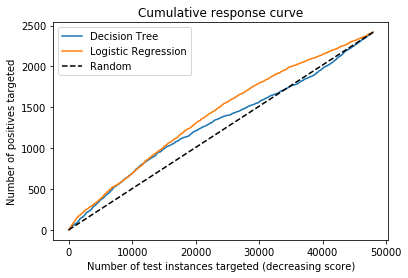

In [23]:
# Let's plot the above results, together
plt.plot(range(0, len(dec_tree_crc)), dec_tree_crc, label="Decision Tree")
plt.plot(range(0, len(logReg_crc)), logReg_crc, label="Logistic Regression")
plt.plot([0,len(logReg_crc)], [0,max(logReg_crc)], 'k--', label="Random")
plt.xlabel("Number of test instances targeted (decreasing score)")
plt.ylabel("Number of positives targeted")
plt.title("Cumulative response curve")
plt.legend()
plt.show()


**Exercise:**

You can actually generate a Cumulative Response Curve (CRC) for Cross Validation !!! How crazy is that !? It is _very_ good practice to try and do this.

(Yes, it is not obvious and will take time)